<a href="https://colab.research.google.com/github/haekalrizky/Beans/blob/master/Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model

## Import library

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

## Load data

In [0]:
train_url = "https://storage.googleapis.com/ibeans/train.zip"
val_url = "https://storage.googleapis.com/ibeans/validation.zip"
test_url = "https://storage.googleapis.com/ibeans/test.zip"

train_path_to_zip = tf.keras.utils.get_file('train.zip', origin=train_url, extract=True)
val_path_to_zip = tf.keras.utils.get_file('validation.zip', origin=val_url, extract=True)
test_path_to_zip = tf.keras.utils.get_file('test.zip', origin=train_url, extract=True)

train_path = os.path.join(os.path.dirname(train_path_to_zip), 'train')
val_path = os.path.join(os.path.dirname(val_path_to_zip), 'validation')
test_path = os.path.join(os.path.dirname(test_path_to_zip), 'test')

143818752/143812152 [==============================] - 1s 0us/step


In [0]:
train_als_dir = os.path.join(train_path, 'angular_leaf_spot') 
train_br_dir = os.path.join(train_path, 'bean_rust') 
train_healthy_dir = os.path.join(train_path, 'healthy')

val_als_dir = os.path.join(val_path, 'angular_leaf_spot') 
val_br_dir = os.path.join(val_path, 'bean_rust') 
val_healthy_dir = os.path.join(val_path, 'healthy') 

test_als_dir = os.path.join(test_path, 'angular_leaf_spot') 
test_br_dir = os.path.join(test_path, 'bean_rust') 
test_healthy_dir = os.path.join(test_path, 'healthy') 

## Check Data

In [0]:
print('Total angular_leaf_spot training images:', len(os.listdir(train_als_dir)))
print('Total bean_rust training images:', len(os.listdir(train_br_dir)))
print('Total healthy training images:', len(os.listdir(train_healthy_dir)), '\n')

print('Total angular_leaf_spot validation images:', len(os.listdir(val_als_dir)))
print('Total bean_rust validation images:', len(os.listdir(val_br_dir)))
print('Total healthy validation images:', len(os.listdir(val_healthy_dir)))

Total angular_leaf_spot training images: 345
Total bean_rust training images: 348
Total healthy training images: 342 

Total angular_leaf_spot validation images: 44
Total bean_rust validation images: 45
Total healthy validation images: 44


In [0]:
total_train = len(os.listdir(train_als_dir)) +  len(os.listdir(train_br_dir)) + len(os.listdir(train_healthy_dir))
total_val = len(os.listdir(val_als_dir)) + len(os.listdir(val_br_dir)) + len(os.listdir(val_healthy_dir))

In [0]:
batch_size = 32
epochs = 100
img_height = 125
img_width = 125

## Prepare data

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='sparse')

Found 1034 images belonging to 3 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_path,
                                                              target_size=(img_height, img_width),
                                                              class_mode='sparse')

Found 133 images belonging to 3 classes.


## Visualize training data

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

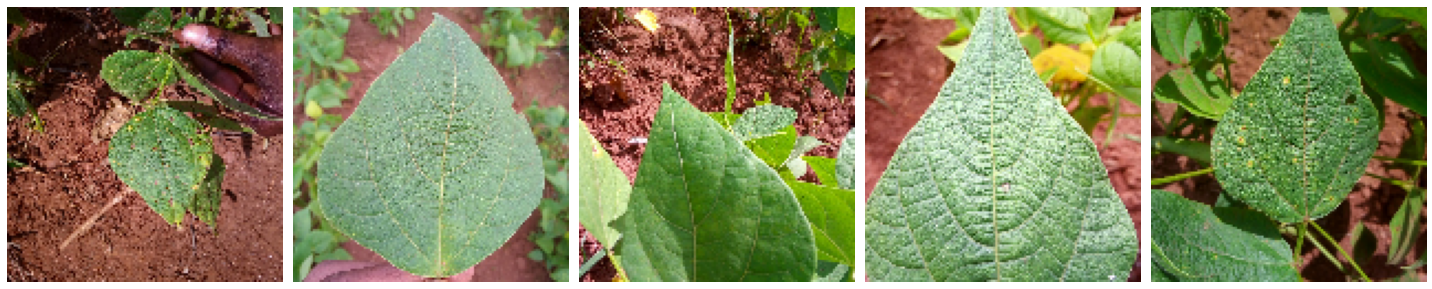

In [0]:
plotImages(sample_training_images[:5])

## Create Model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers. MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## Compile model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

## Train model

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
32/32 [==============================] - 6s 200ms/step - loss: 1.0482 - accuracy: 0.4601 - val_loss: 0.8744 - val_accuracy: 0.5781
Epoch 2/100
32/32 [==============================] - 6s 193ms/step - loss: 0.8196 - accuracy: 0.6188 - val_loss: 0.7558 - val_accuracy: 0.7031
Epoch 3/100
32/32 [==============================] - 6s 195ms/step - loss: 0.6880 - accuracy: 0.7076 - val_loss: 0.7444 - val_accuracy: 0.6953
Epoch 4/100
32/32 [==============================] - 6s 184ms/step - loss: 0.6224 - accuracy: 0.7285 - val_loss: 0.6264 - val_accuracy: 0.7344
Epoch 5/100
32/32 [==============================] - 6s 182ms/step - loss: 0.4953 - accuracy: 0.8004 - val_loss: 0.5737 - val_accuracy: 0.7422
Epoch 6/100
32/32 [==============================] - 6s 183ms/step - loss: 0.4414 - accuracy: 0.8214 - val_loss: 0.6056 - val_accuracy: 0.7891
Epoch 7/100
32/32 [==============================] - 6s 183ms/step - loss: 0.3471 - accuracy: 0.8633 - val_loss: 0.6900 - val_accuracy: 0.7422

## Visualize training and validation results

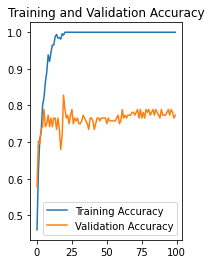

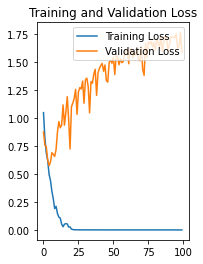

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [0]:
tf.keras.backend.clear_session()

# Improved model

## Apply data augmentation

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                    )

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_path,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode='sparse')

Found 1034 images belonging to 3 classes.


## Visualize augmented data

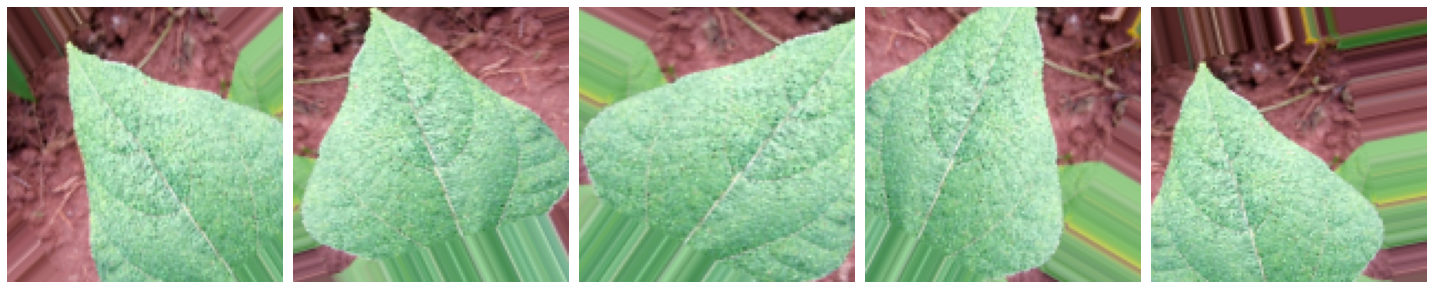

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_path,
                                                 target_size=(img_height, img_width),
                                                 class_mode='sparse')

Found 133 images belonging to 3 classes.


## Create new model with dropout layer(s)

In [0]:
new_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## Compile new model

In [0]:
new_model.compile(optimizer='adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0

## Train new model

In [0]:
history = new_model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
32/32 [==============================] - 9s 273ms/step - loss: 1.4933 - accuracy: 0.3164 - val_loss: 1.0984 - val_accuracy: 0.3828
Epoch 2/100
32/32 [==============================] - 9s 273ms/step - loss: 1.0985 - accuracy: 0.3573 - val_loss: 1.0978 - val_accuracy: 0.4375
Epoch 3/100
32/32 [==============================] - 9s 272ms/step - loss: 1.0975 - accuracy: 0.4122 - val_loss: 1.0943 - val_accuracy: 0.4766
Epoch 4/100
32/32 [==============================] - 9s 274ms/step - loss: 1.0918 - accuracy: 0.3733 - val_loss: 1.0751 - val_accuracy: 0.3984
Epoch 5/100
32/32 [==============================] - 9s 269ms/step - loss: 1.0294 - accuracy: 0.4750 - val_loss: 0.9004 - val_accuracy: 0.5625
Epoch 6/100
32/32 [==============================] - 9s 270ms/step - loss: 0.8843 - accuracy: 0.5898 - val_loss: 0.7441 - val_accuracy: 0.6719
Epoch 7/100
32/32 [==============================] - 9s 271ms/step - loss: 0.8703 - accuracy: 0.6098 - val_loss: 0.7472 - val_accuracy: 0.6484

## Visualize convolutions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


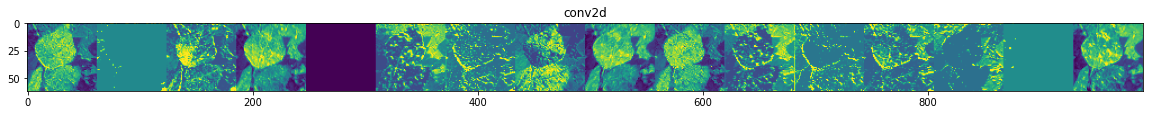

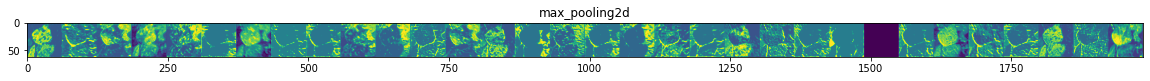

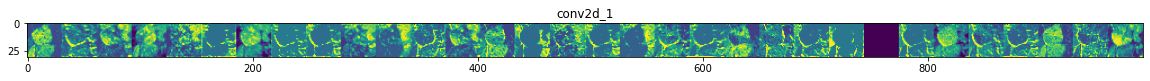

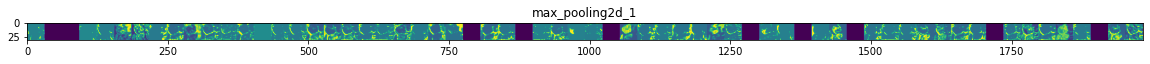

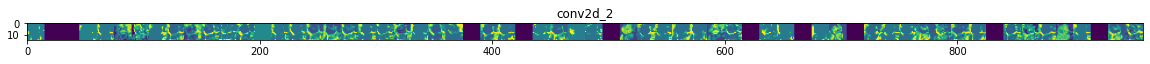

In [0]:
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

beans_als_files = [os.path.join(train_als_dir, f) for f in os.listdir(train_als_dir)]
beans_br_files = [os.path.join(train_br_dir, f) for f in os.listdir(train_br_dir)]
beans_healthy_files = [os.path.join(train_healthy_dir, f) for f in os.listdir(train_healthy_dir)]

img_path = random.choice(beans_als_files + beans_br_files + beans_healthy_files)
img = load_img(img_path, target_size=(125, 125))

x   = img_to_array(img)                          
x   = x.reshape((1,) + x.shape)                   

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
  
    n_features = feature_map.shape[-1]  
    size       = feature_map.shape[ 1]  
 
    display_grid = np.zeros((size, size * n_features))
   
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x 

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

## Visualize training and validation results

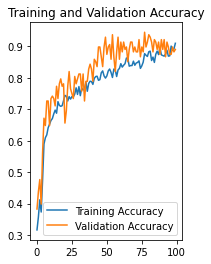

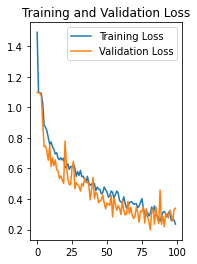

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()